# Library Analysis

This is the second part of my analysis. If you want to see the how I was able to get all my data, go find my Technical Analysis on my github. In this section, I will be analysing data to answer some of my question I formulated at the start of the project. 

## Questions:

- On average, what is the cheapeast day to buy my library?
- Which shop provides the cheapest prices of games? The most expensive?

## Cleaning:

In this line of code, I read the csv files from my sales folder I gather for a month and merged them togethe to create the giant csv file 

In [1]:
import requests
import pandas as pd
import datetime
import time
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
folder_path = "C:\\Users\\carza\\Documents\\python projects\\Api projects\\Sales"
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f)
    all_df.append(df)
    
library = pd.concat(all_df, ignore_index=True)

In [70]:
library.to_csv('library.csv', index=False) 

In [2]:
library=pd.read_csv('library.csv')

## General  Analysis

In [3]:
library.head()

,Time,title,steamAppID,storeID,price,retailprice,savings,storeName
0,2025-01-13,NieR: Automata,524220.0,1,39.99,39.99,0.0,Steam
1,2025-01-13,NieR Replicant ver.1.22474487139...,1113560.0,1,59.99,59.99,0.0,Steam
2,2025-01-13,Persona 5 Royal,1687950.0,1,59.99,59.99,0.0,Steam
3,2025-01-13,Persona 3 Reload,2161700.0,1,69.99,69.99,0.0,Steam
4,2025-01-13,Persona 4 Golden,1113000.0,1,19.99,19.99,0.0,Steam


In [4]:
store_sav=library.groupby(['storeName'])['savings'].mean().sort_values(ascending=False).round().reset_index()
store_sav

,storeName,savings
0,GameBillet,39.0
1,Gamesplanet,33.0
2,IndieGala,32.0
3,GOG,32.0
4,Voidu,30.0
5,Fanatical,29.0
6,WinGameStore,28.0
7,GamersGate,28.0
8,Humble Store,26.0
9,DLGamer,23.0


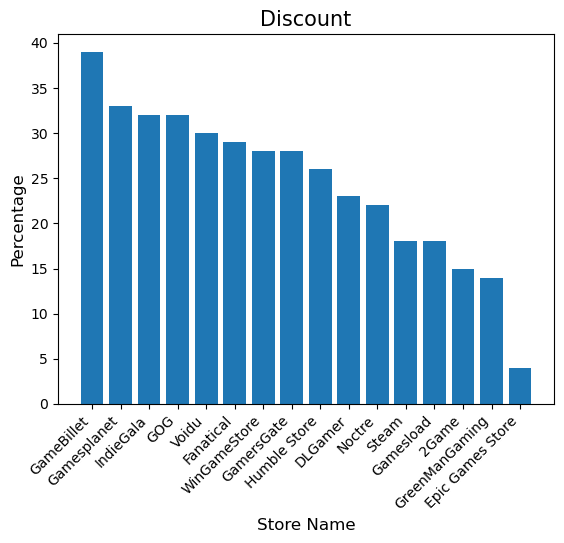

In [5]:
plt.bar(store_sav['storeName'], store_sav['savings'])
plt.title('Discount',fontsize=15)
plt.xlabel('Store Name',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In this bar graph, we can see that GameBillet gives the most discounted games for my entire library at around a 39% discount price. At the other side of the chart, the Epic Game Store provides the least discounts for my library at around 4% discount.

In [6]:
game_sav=library.groupby(['title'])['savings'].mean().sort_values(ascending=False).round().reset_index()
game_sav

,title,savings
0,XCOM 2: War of the Chosen,31.0
1,MONSTER HUNTER RISE,31.0
2,FINAL FANTASY X/X-2 HD Remaster,31.0
3,NieR Replicant ver.1.22474487139...,30.0
4,Persona 5 Royal,28.0
5,MONSTER HUNTER: WORLD,25.0
6,Persona 3 Reload,24.0
7,Persona 4 Golden,21.0
8,Metaphor: ReFantazio,18.0
9,NieR: Automata,17.0


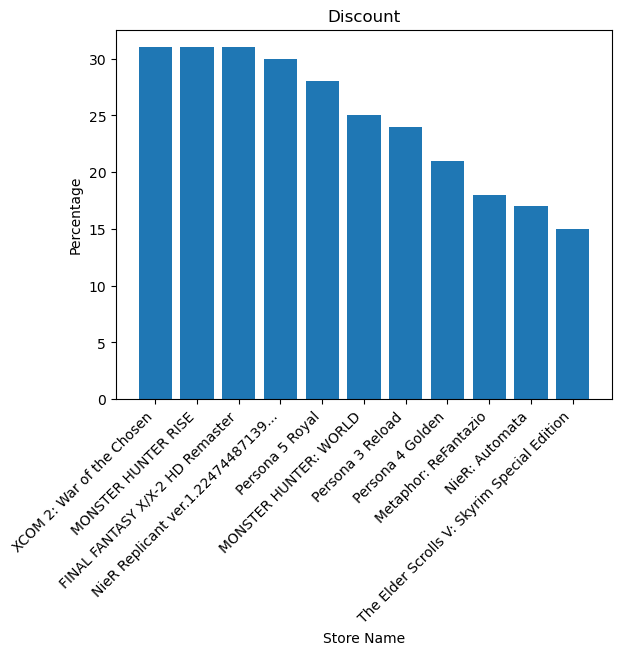

In [7]:
plt.bar(game_sav['title'], game_sav['savings'])
plt.title('Discount')
plt.xlabel('Store Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

XCOM2, Monster Hunter Rise, and Final Fantasy X were discounted the most during the data collection with about a 31% discount. In the other side, The Elder Scrolls V was the least disounted during this period with average discount of 15%.

In [8]:
game_price=library.groupby(['title'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
game_price

,title,price
0,Metaphor: ReFantazio,57.53
1,Persona 3 Reload,53.15
2,Persona 5 Royal,43.10
3,NieR Replicant ver.1.22474487139...,42.25
4,The Elder Scrolls V: Skyrim Special Edition,33.89
5,NieR: Automata,33.32
6,MONSTER HUNTER RISE,28.39
7,XCOM 2: War of the Chosen,27.51
8,MONSTER HUNTER: WORLD,24.82
9,FINAL FANTASY X/X-2 HD Remaster,20.74


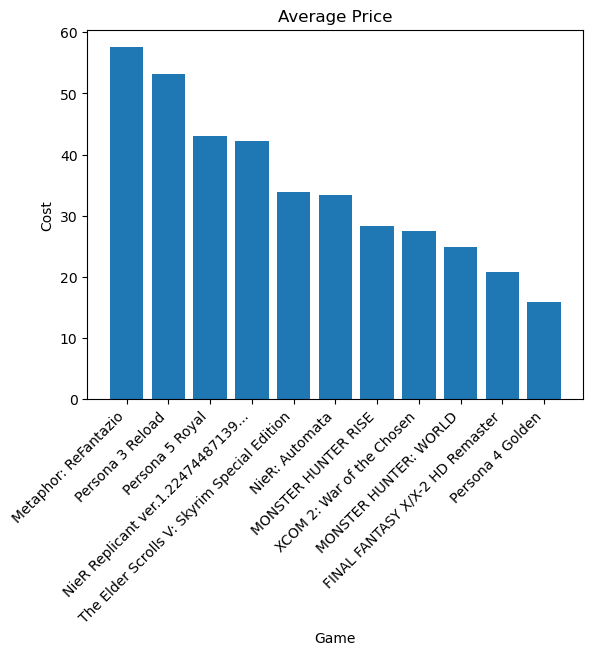

In [9]:
plt.bar(game_price['title'], game_price['price'])
plt.title('Average Price')
plt.xlabel('Game')
plt.ylabel('Cost')
plt.xticks(rotation=45, ha='right')
plt.show()

Discounts usually doesn't mean cheaper price if the game was already cheap on retail. On this graph, we see that Metaphor: ReFantazio was the most expensive game to buy with a price of 57.53 dollars while Persona 4 Golden was the cheapest with a price of 15.89 dollars

In [10]:
date_sav=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index()

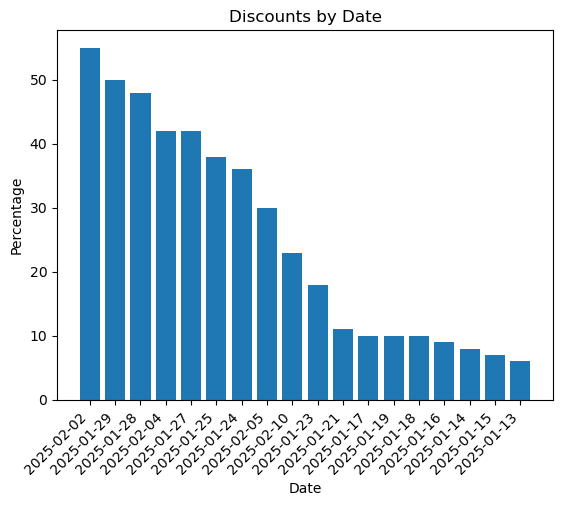

In [11]:
plt.bar(date_sav['Time'], date_sav['savings'])
plt.title('Discounts by Date')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
date_sav_top_5=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index().head(5)
date_sav_top_5

,Time,savings
0,2025-02-02,55.0
1,2025-01-29,50.0
2,2025-01-28,48.0
3,2025-02-04,42.0
4,2025-01-27,42.0


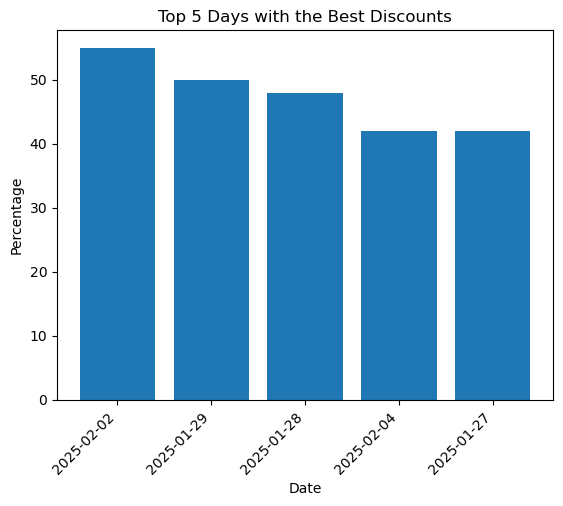

In [13]:
plt.bar(date_sav_top_5['Time'], date_sav_top_5['savings'])
plt.title('Top 5 Days with the Best Discounts')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
date_sav_last_5=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index().tail(5)
date_sav_last_5

,Time,savings
13,2025-01-18,10.0
14,2025-01-16,9.0
15,2025-01-14,8.0
16,2025-01-15,7.0
17,2025-01-13,6.0


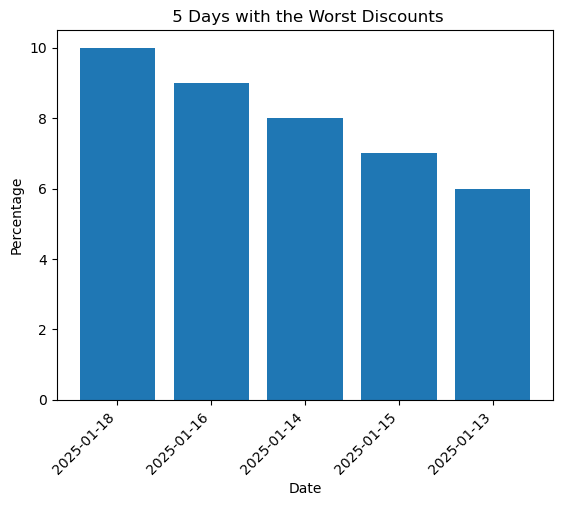

In [15]:
plt.bar(date_sav_last_5['Time'], date_sav_last_5['savings'])
plt.title(' 5 Days with the Worst Discounts')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

Now we group the data based on the dates. We found that the best day for discounted games was on February 2, 2025 with a 55% discount. The only other day that had a discount of 50% or higher was on January 29, 2025 with a 50% discount. Now, the worst day for discounts was on January 13, 2025 with a 6% discount

## Game Analysis

In this section, I will be going to check each game and answer a few questions.

**Question:**
- On average, which store provides the cheapest price of the game? The most expensive?
- Which day provided the cheapest and most expensive price for these games? 

### XCOM 2: War of the Chosen

**Summary:**

- Expensive Store: Gamesload; \$39.99 
- Cheapest Store: Fanatical; \$19.67
- Most Expensive Day to buy: January 15,2025; \$38.99
- Cheapest Day to buy: February 2, 2025; \$9.41


In [16]:
XCOM2 =library[library['title']=='XCOM 2: War of the Chosen']
XCOM2.head()

,Time,title,steamAppID,storeID,price,retailprice,savings,storeName
11,2025-01-13,XCOM 2: War of the Chosen,NaN,30,39.99,39.99,0.000000,IndieGala
19,2025-01-13,XCOM 2: War of the Chosen,NaN,3,39.99,39.99,0.000000,GreenManGaming
29,2025-01-13,XCOM 2: War of the Chosen,NaN,11,39.99,39.99,0.000000,Humble Store
38,2025-01-13,XCOM 2: War of the Chosen,NaN,23,33.96,39.99,15.078770,GameBillet
46,2025-01-13,XCOM 2: War of the Chosen,NaN,15,35.09,39.99,12.253063,Fanatical


In [22]:
XCOM2_price=XCOM2.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
XCOM2_price

,storeName,price
0,Gamesload,39.99
1,GreenManGaming,39.99
2,2Game,31.99
3,Humble Store,31.99
4,IndieGala,27.86
5,GamersGate,25.99
6,Voidu,25.99
7,GOG,25.99
8,Noctre,25.84
9,GameBillet,22.16


In [20]:
XCOM2_time=XCOM2.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
XCOM2_time

,Time,price
0,2025-01-15,38.99
1,2025-01-13,38.61
2,2025-01-14,38.61
3,2025-01-16,38.53
4,2025-01-17,38.53
5,2025-01-18,38.53
6,2025-01-19,38.53
7,2025-01-21,38.53
8,2025-01-23,27.89
9,2025-02-10,25.67


### MONSTER HUNTER RISE

**Summary:**

- Expensive Store: 2Game; \$33.33 
- Cheapest Store: GamesPlanet; \$16.50
- Most Expensive Day to buy: January 13,2025; \$38.37
- Cheapest Day to buy: February 2, 2025; \$9.21

In [23]:
MHR =library[library['title']=='MONSTER HUNTER RISE']

MHR_price=MHR.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
MHR_time=MHR.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(MHR_time)
print(MHR_price)

          Time  price
0   2025-01-13  38.37
1   2025-01-14  36.35
2   2025-01-15  36.35
3   2025-01-16  36.35
4   2025-01-17  36.35
5   2025-01-18  36.35
6   2025-01-19  36.35
7   2025-01-21  35.96
8   2025-01-23  29.50
9   2025-02-10  28.71
10  2025-01-25  27.03
11  2025-01-24  27.03
12  2025-02-05  24.31
13  2025-01-27  22.99
14  2025-02-04  20.39
15  2025-01-28  15.81
16  2025-01-29  13.51
17  2025-02-02   9.21
         storeName  price
0            2Game  33.33
1           Noctre  33.24
2     WinGameStore  32.12
3     Humble Store  31.66
4            Steam  31.66
5        IndieGala  29.82
6   GreenManGaming  29.74
7       GamersGate  29.66
8        Gamesload  28.33
9            Voidu  28.33
10       Fanatical  23.53
11      GameBillet  21.11
12     Gamesplanet  16.50


### FINAL FANTASY X/X-2 HD Remaster

**Summary:**

- Expensive Store: GreenManGaming; \$28.99 
- Cheapest Store: IndieGala; \$12.98
- Most Expensive Day to buy: January 13,2025; \$25.74
- Cheapest Day to buy: February 5, 2025; \$16.74

In [24]:
FFX =library[library['title']=='FINAL FANTASY X/X-2 HD Remaster']

FFX_price=FFX.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
FFX_time=FFX.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(FFX_time)
print(FFX_price)

          Time  price
0   2025-01-13  25.74
1   2025-01-14  25.74
2   2025-01-15  25.74
3   2025-02-10  21.24
4   2025-01-17  21.24
5   2025-01-18  21.24
6   2025-01-19  21.24
7   2025-01-21  21.24
8   2025-01-23  21.24
9   2025-01-16  21.24
10  2025-01-25  21.24
11  2025-01-27  21.24
12  2025-01-24  21.24
13  2025-01-28  16.74
14  2025-01-29  16.74
15  2025-02-02  16.74
16  2025-02-04  16.74
17  2025-02-05  16.74
        storeName  price
0  GreenManGaming  28.99
1           Steam  24.99
2    Humble Store  15.99
3       IndieGala  12.98


### NieR Replicant ver.1.22474487139...

**Summary:**

- Expensive Store: GreenManGaming; \$52.39
- Cheapest Store: IndieGala; \$34.24
- Most Expensive Day to buy: January 13,2025; \$57.99
- Cheapest Day to buy: February 5, 2025; \$29.01

In [26]:
NR =library[library['title']=='NieR Replicant ver.1.22474487139...']

NR_price=NR.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
NR_time=NR.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(NR_time)
print(NR_price)

          Time  price
0   2025-01-13  52.39
1   2025-01-14  52.24
2   2025-01-15  52.24
3   2025-02-10  43.24
4   2025-01-17  43.24
5   2025-01-18  43.24
6   2025-01-19  43.24
7   2025-01-21  43.24
8   2025-01-23  43.24
9   2025-01-16  43.24
10  2025-01-25  43.24
11  2025-01-27  43.24
12  2025-01-24  43.24
13  2025-01-28  34.24
14  2025-01-29  34.24
15  2025-02-02  34.24
16  2025-02-04  34.24
17  2025-02-05  34.24
        storeName  price
0  GreenManGaming  57.99
1           Steam  49.99
2    Humble Store  31.99
3       IndieGala  29.01


### Persona 5 Royal	

**Summary:**

- Expensive Store: 2Game; \$51.99
- Cheapest Store: IndieGala; \$35.90
- Most Expensive Day to buy: January 15,2025; \$56.30
- Cheapest Day to buy: February 5, 2025; \$22.54

In [29]:
P5 =library[library['title']=='Persona 5 Royal']

P5_price=P5.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P5_time=P5.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(P5_time)
print(P5_price)

          Time  price
0   2025-01-15  56.30
1   2025-01-16  56.30
2   2025-01-17  56.30
3   2025-01-18  56.30
4   2025-01-19  56.30
5   2025-01-13  54.52
6   2025-01-14  54.52
7   2025-01-21  52.83
8   2025-01-23  52.83
9   2025-02-10  50.52
10  2025-02-05  42.52
11  2025-01-24  30.40
12  2025-01-25  26.90
13  2025-01-27  26.90
14  2025-01-28  26.90
15  2025-01-29  26.90
16  2025-02-04  26.01
17  2025-02-02  22.54
        storeName  price
0           2Game  51.99
1  GreenManGaming  45.06
2    Humble Store  43.99
3           Steam  43.99
4         DLGamer  43.67
5    WinGameStore  42.43
6     Gamesplanet  41.93
7       Fanatical  38.92
8      GameBillet  35.90


### MONSTER HUNTER: WORLD

**Summary:**

- Expensive Store: IndieGala; \$59.99
- Cheapest Store: Gamesplanet; \$15.16
- Most Expensive Day to buy: January 13,2025; \$31.08
- Cheapest Day to buy: February 2, 2025; \$13.23

In [28]:
MHW =library[library['title']=='MONSTER HUNTER: WORLD']

MHW_price=MHW.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
MHW_time=MHW.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(MHW_time)
print(MHW_price)

          Time  price
0   2025-01-13  31.08
1   2025-01-15  29.72
2   2025-01-16  29.72
3   2025-01-17  29.72
4   2025-01-18  29.72
5   2025-01-19  29.72
6   2025-01-14  29.72
7   2025-01-21  29.43
8   2025-01-23  25.17
9   2025-01-25  25.05
10  2025-01-24  25.05
11  2025-02-10  23.61
12  2025-01-27  22.19
13  2025-02-05  20.73
14  2025-02-04  19.18
15  2025-01-28  17.64
16  2025-01-29  16.10
17  2025-02-02  13.23
         storeName  price
0        IndieGala  59.99
1            2Game  25.53
2           Noctre  25.46
3     Humble Store  24.41
4            Steam  24.41
5       GamersGate  22.96
6   GreenManGaming  22.64
7     WinGameStore  22.27
8        Gamesload  22.18
9            Voidu  22.18
10       Fanatical  18.74
11      GameBillet  16.74
12     Gamesplanet  15.16


### Persona 3 Reload

**Summary:**

- Expensive Store: 2Game; \$56.38
- Cheapest Store: GamesBillet; \$49.73
- Most Expensive Day to buy: January 13,2025; \$65.93
- Cheapest Day to buy: February 2, 2025; \$32.88

In [30]:
P3 =library[library['title']=='Persona 3 Reload']

P3_price=P3.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P3_time=P3.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(P3_time)
print(P3_price)

          Time  price
0   2025-01-13  65.93
1   2025-01-14  65.93
2   2025-01-15  65.93
3   2025-01-16  65.93
4   2025-01-17  65.93
5   2025-01-18  65.93
6   2025-01-19  65.93
7   2025-01-21  65.93
8   2025-01-23  65.93
9   2025-02-10  62.04
10  2025-02-05  54.26
11  2025-01-24  40.62
12  2025-01-25  37.29
13  2025-02-04  36.10
14  2025-01-27  33.40
15  2025-01-28  33.40
16  2025-01-29  33.40
17  2025-02-02  32.88
        storeName  price
0           2Game  56.38
1  GreenManGaming  55.02
2    Humble Store  54.43
3           Steam  54.43
4         DLGamer  53.19
5    WinGameStore  52.66
6     Gamesplanet  51.32
7       Fanatical  51.21
8      GameBillet  49.73


### Persona 4 Golden

**Summary:**

- Expensive Store: 2Game; \$16.88
- Cheapest Store: GamesBillet; \$14.72
- Most Expensive Day to buy: January 18,2025; \$18.94
- Cheapest Day to buy: February 2, 2025; \$11.28

In [31]:
P4 =library[library['title']=='Persona 4 Golden']

P4_price=P4.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P4_time=P4.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(P4_time)
print(P4_price)

          Time  price
0   2025-01-18  18.94
1   2025-01-19  18.94
2   2025-01-13  18.92
3   2025-01-14  18.92
4   2025-01-15  18.92
5   2025-01-16  18.92
6   2025-01-17  18.92
7   2025-01-21  18.12
8   2025-01-23  18.12
9   2025-02-10  18.05
10  2025-02-05  16.27
11  2025-01-24  13.07
12  2025-01-25  12.35
13  2025-02-04  12.09
14  2025-01-27  11.46
15  2025-01-28  11.46
16  2025-01-29  11.28
17  2025-02-02  11.28
        storeName  price
0           2Game  16.88
1    Humble Store  16.43
2           Steam  16.43
3  GreenManGaming  16.41
4    WinGameStore  16.08
5         DLGamer  15.76
6     Gamesplanet  15.46
7      GameBillet  14.85
8       Fanatical  14.72


### Metaphor: ReFantazio

**Summary:**

- Expensive Store: Fanatical; \$60.89
- Cheapest Store: GamesBillet; \$51.81
- Most Expensive Day to buy: January 13-16,2025; \$64.96
- Cheapest Day to buy: February 2, 2025; \$45.32

In [32]:
Metaphor =library[library['title']=='Metaphor: ReFantazio']

Metaphor_price=Metaphor.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
Metaphor_time=Metaphor.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(Metaphor_time)
print(Metaphor_price)

          Time  price
0   2025-01-13  64.96
1   2025-01-14  64.96
2   2025-01-15  64.96
3   2025-01-16  64.96
4   2025-01-17  64.68
5   2025-01-18  64.68
6   2025-01-19  64.68
7   2025-01-21  63.05
8   2025-01-23  62.97
9   2025-02-10  61.19
10  2025-02-05  56.99
11  2025-01-24  53.07
12  2025-01-25  48.04
13  2025-01-27  48.04
14  2025-01-28  48.04
15  2025-01-29  48.04
16  2025-02-04  47.74
17  2025-02-02  45.32
        storeName  price
0       Fanatical  60.89
1    Humble Store  60.66
2           Steam  60.66
3  GreenManGaming  59.92
4    WinGameStore  56.46
5         DLGamer  56.46
6     Gamesplanet  56.38
7           2Game  55.14
8       IndieGala  54.19
9      GameBillet  51.81


### NieR: Automata

- Store: \$33.32
- Most Expensive Day to buy: January 13-29,2025; \$39.99
- Cheapest Day to buy: February 2, 2025; \$15.99

In [35]:
NA =library[library['title']=='NieR: Automata']

NA_price=NA.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
NA_time=NA.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(NA_time)
print(NA_price)

          Time  price
0   2025-01-13  39.99
1   2025-01-21  39.99
2   2025-01-27  39.99
3   2025-01-25  39.99
4   2025-01-14  39.99
5   2025-01-23  39.99
6   2025-01-24  39.99
7   2025-01-19  39.99
8   2025-01-18  39.99
9   2025-01-17  39.99
10  2025-01-16  39.99
11  2025-01-15  39.99
12  2025-02-10  39.99
13  2025-01-28  15.99
14  2025-01-29  15.99
15  2025-02-02  15.99
16  2025-02-04  15.99
17  2025-02-05  15.99
  storeName  price
0     Steam  33.32


### The Elder Scrolls V: Skyrim Special Edition

- Store: \$33.32
- Most Expensive Day to buy: January 13-29,2025; \$39.99
- Cheapest Day to buy: February 2, 2025; \$15.99

In [37]:
S5 =library[library['title']=='The Elder Scrolls V: Skyrim Special Edition']

S5_price=NA.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
S5_time=NA.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(S5_time)
print(S5_price)

          Time  price
0   2025-01-13  39.99
1   2025-01-21  39.99
2   2025-01-27  39.99
3   2025-01-25  39.99
4   2025-01-14  39.99
5   2025-01-23  39.99
6   2025-01-24  39.99
7   2025-01-19  39.99
8   2025-01-18  39.99
9   2025-01-17  39.99
10  2025-01-16  39.99
11  2025-01-15  39.99
12  2025-02-10  39.99
13  2025-01-28  15.99
14  2025-01-29  15.99
15  2025-02-02  15.99
16  2025-02-04  15.99
17  2025-02-05  15.99
  storeName  price
0     Steam  33.32
